ASSIGNMENT ONE

# **Predict the price of a house**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data set
data= pd.read_excel("/content/DS - Assignment Part 1 data set.xlsx", header=0)

In [3]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
data.shape

(414, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB



1.   This data has 414 rows and 9 columns
2.   No missing values

1.   It contains only 2 datatypes -- int and float





In [6]:
data['Transaction date']=data['Transaction date'].apply(np.floor).astype(int) #converting float to int

In [7]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [8]:
data['Transaction date'].value_counts()

2013    288
2012    126
Name: Transaction date, dtype: int64

In [9]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


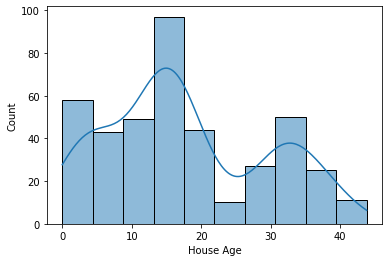

In [10]:
sns.histplot(data = data['House Age'], kde = True)

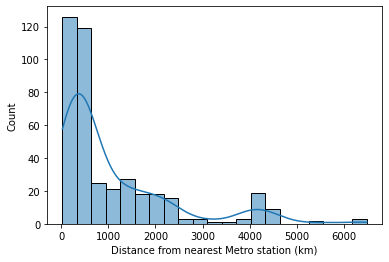

In [11]:
sns.histplot(data = data['Distance from nearest Metro station (km)'], kde = True)

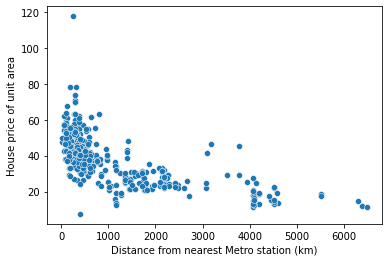

In [12]:
sns.scatterplot(data=data, x="Distance from nearest Metro station (km)", y="House price of unit area")

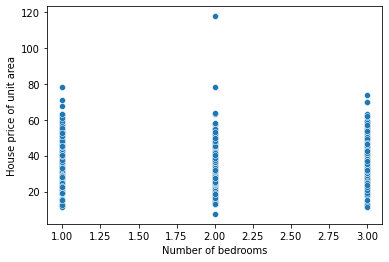

In [13]:
sns.scatterplot(data=data, x="Number of bedrooms", y="House price of unit area")

In [14]:
data['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

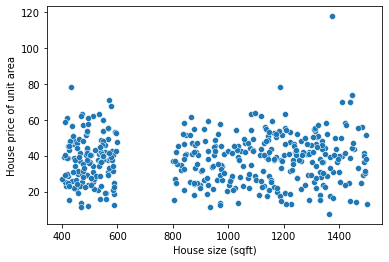

In [15]:
sns.scatterplot(data=data, x="House size (sqft)", y="House price of unit area")

In [16]:
correlation=data.corr()

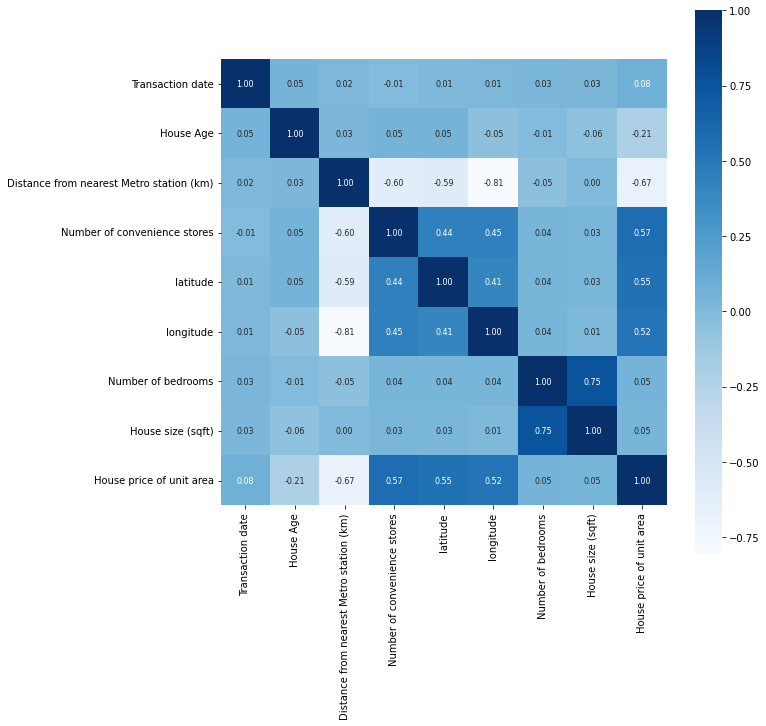

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')



*   After analysing the histogram and scatter plot it    clearly shows the presence of outliers in "Distance from nearest Metro station (km)"
*   Both "Number of bedrooms" and "House size (sqft)" have no impact on House price

*   Outliers can be removed by percentile and "Number of bedrooms" and "House size (sqft)" can remove from the data since they have no impact on the output

*   "Transaction date" is not useful for the final prediction, so it can be removed 
*   Both "House Age" and "Distance from nearest Metro station (km)" are negatively correlated








In [18]:
uv=np.percentile(data["Distance from nearest Metro station (km)"],[70])[0]

In [19]:
uv

1172.0105999999976

In [20]:
data[(data["Distance from nearest Metro station (km)"]>uv)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
5,2012,7.1,2175.030,3,24.96305,121.51254,3,828,32.1
8,2013,31.7,5512.038,1,24.95095,121.48458,1,588,18.8
9,2013,17.9,1783.180,3,24.96731,121.51486,2,1075,22.1
13,2012,20.4,2469.645,4,24.96108,121.51046,3,928,23.8
20,2013,4.5,2275.877,3,24.96314,121.51151,2,1487,29.3
...,...,...,...,...,...,...,...,...,...
398,2013,14.7,1717.193,2,24.96447,121.51649,1,425,23.0
401,2013,7.6,2175.030,3,24.96305,121.51254,2,1247,27.7
407,2013,5.2,2408.993,0,24.95505,121.55964,1,587,22.3
408,2013,18.5,2175.744,3,24.96330,121.51243,1,477,28.1


In [21]:
data["Distance from nearest Metro station (km)"][(data["Distance from nearest Metro station (km)"]>uv)]=uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,640.217883,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.460687,11.392485,411.748866,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.000000,28.150000,1172.010600,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.000000,43.800000,1172.010600,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


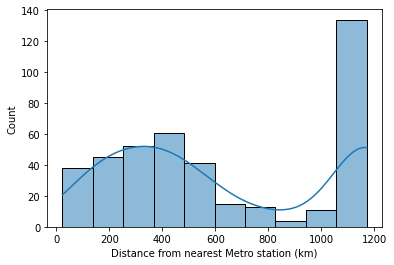

In [23]:
sns.histplot(data = data['Distance from nearest Metro station (km)'], kde = True)

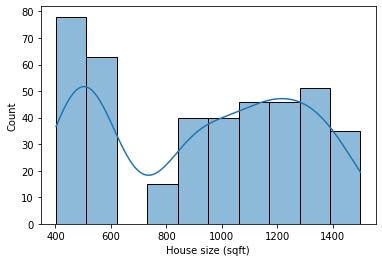

In [24]:
sns.histplot(data = data['House size (sqft)'], kde = True)

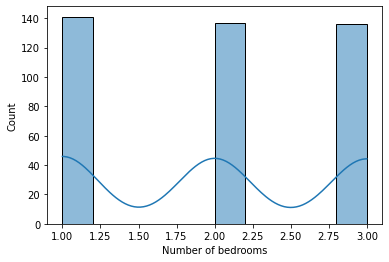

In [25]:
sns.histplot(data = data['Number of bedrooms'], kde = True)

In [26]:
x=data.drop(['Transaction date','House price of unit area','Number of bedrooms','House size (sqft)'], axis=1)

In [27]:
x.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [28]:
y=data['House price of unit area']

In [29]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64



*   Input values are in different ranges, so it's better to scale 'x' before training



In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_standardized=scaler.fit_transform(x)

In [31]:
x_standardized

array([[ 1.25562833, -1.35036433,  2.00740743,  1.12542986,  0.44876222],
       [ 0.15708622, -0.81123925,  1.66750286,  0.91244418,  0.40113894],
       [-0.38779067, -0.19023256,  0.30788458,  1.48686011,  0.68818339],
       ...,
       [ 0.09556786, -0.60607296,  0.98769372,  0.82289338,  0.42397202],
       [-0.84478419, -1.30189936,  0.30788458, -0.18475479,  0.4768143 ],
       [-0.98539758, -1.33680269,  1.66750286,  0.42757905,  0.63534112]])

In [32]:
x_standardized.std()

1.0

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#splitting the data as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_standardized, y, test_size=0.2, random_state=3)

In [34]:
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(331, 5) (83, 5) (331,) (83,)


In [35]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [36]:
models = [LinearRegression(),RandomForestRegressor(n_estimators=100), XGBRegressor(max_depth=3,n_estimators=60), DecisionTreeRegressor(max_depth=3)]

In [38]:
#defining a function to train multiple models together
def model_train():

  for model in models:

    # training the model
    model.fit(X_train, Y_train)
    
    # evaluating the model
    train_prediction= model.predict(X_train)
    test_prediction = model.predict(X_test)
    joblib.dump(model, str(model))

    r2_train = r2_score(Y_train, train_prediction)
    mse_train= mean_squared_error(Y_train, train_prediction)

    r2_test = r2_score(Y_test, test_prediction)
    mse_test= mean_squared_error(Y_test, test_prediction)

    print(f'Model: {model}, r2_train:{r2_train}, mse_train:{mse_train}, r2_test:{r2_test}, mse_test:{mse_test}')


In [39]:
model_train()

Model: LinearRegression(), r2_train:0.6378084165120359, mse_train:66.01470573873893, r2_test:0.7268523305136457, mse_test:53.0199062819012
Model: RandomForestRegressor(), r2_train:0.9495075429152012, mse_train:9.202987723732289, r2_test:0.8092046532318886, mse_test:37.03473444855245
[03:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(n_estimators=60), r2_train:0.8709743868999065, mse_train:23.51680234956674, r2_test:0.7919396690506063, mse_test:40.385990730443694
Model: DecisionTreeRegressor(max_depth=3), r2_train:0.6954647133330564, mse_train:55.506003598365915, r2_test:0.7047453128054755, mse_test:57.311035725779064




*   Data trained with four different models.
*   There is a chance of underfitting in linear regression model means model didn't learn from the training data because of less no of data. 

*   In case of decision tree algorithm -- model has same test and train accuracy but comparitively less performance.

*   Out of four models random forest and xgb regressor performs well eventhough there will be chance of overfitting issue in case of random forest regressor.
*   Becasue of less no of training data and features none of the model couldn't perform as expected.

*   XGBRegressor: r2_test:0.79, mse_test:40.38

*   Models can performs better with more no of data.










Creating a prediction system using XGB regressor

In [48]:
input_data = (19.5,306.59470,9,24.98034,121.53951)
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardising the data
std_data = scaler.transform(input_data_reshaped)
#loading the saved model
model=joblib.load("XGBRegressor(n_estimators=60)")
prediction = model.predict(std_data)
print(f'The house price of unit area {prediction[0]}')

[03:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The house price of unit area 45.7504768371582


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
